# Universal Approximation Theorem

Universal Approximation Theorem이란 1개의 비선형 Activation함수를 포함하고 있는 히든 레이어를 가진 Neural Network를 이용해 어떠한 함수든 근사시킬 수 있다는 이론.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

device = "cuda" if torch.cuda.is_available() else "cpu"

In [2]:
def func(x):
    """
    근사시키려는 함수
    """
    return 7*np.sin(x)*np.cos(x)*(2*x**2+5*x**3+x**2)*np.tan(x)+120 

In [3]:
x = np.linspace(-10, 10, 100)
y = func(x)

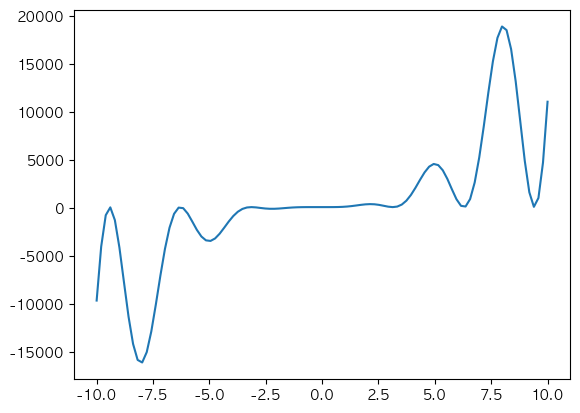

In [4]:
plt.plot(x, y)
plt.show()

In [6]:
X_train = torch.tensor(x, dtype=torch.float32).unsqueeze(dim=1).to(device)
y_train = torch.tensor(y, dtype=torch.float32).unsqueeze(dim=1).to(device)

In [17]:
# 모델
# 자동으로 계산됨
model = nn.Sequential(
    nn.Linear(1, 10000),
    nn.ReLU(),
    nn.Linear(10000, 1),
).to(device)

loss_fn = nn.MSELoss()
optimizer = torch.optim.RMSprop(model.parameters(), lr=0.01)

In [18]:
# 학습
model.train()

for epoch in range(5000) :
    #추론
    pred = model(X_train)
    #오차
    loss = loss_fn(pred, y_train)
    #gradient
    loss.backward()
    #parameter update
    optimizer.step()
    #parameter reset
    optimizer.zero_grad()
print('완료')

완료


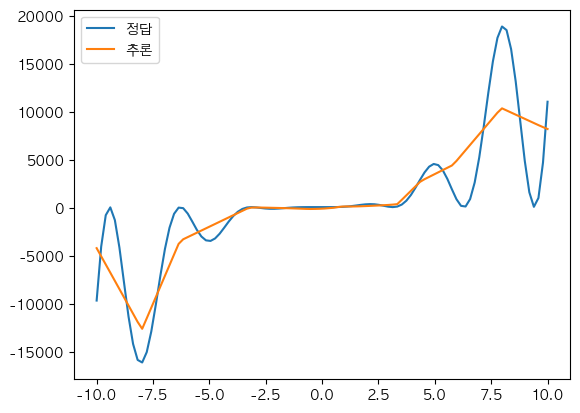

In [19]:
y_pred = model(X_train)

#y_pred값 ndarray로 변환
# 1. device를 cpu로 이동
# 2. gradient_fn 있는 경우 제거
y_pred_array = y_pred.to("cpu").detach().numpy().flatten()

plt.plot(x, y, label='정답')
plt.plot(x, y_pred_array, label='추론')
plt.legend()
plt.show()

SyntaxError: invalid syntax (1254145494.py, line 1)